# Author: Sandesh Basnet

# Generative Adversarial Network(GAN)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from tqdm import tqdm

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dense, BatchNormalization, Reshape
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dropout
from keras.optimizers import Adam

In [ ]:
from keras.datasets import mnist

In [ ]:
discriminator = Sequential()

discriminator.add(Conv2D(filters=3,
               kernel_size=(3, 3),
               strides=(1, 1),
               activation='relu',
               input_shape=(28, 28, 1)
              )
       )
discriminator.add(Dropout(0.2))
discriminator.add(MaxPooling2D())

discriminator.add(Conv2D(filters=6,
               kernel_size=(3, 3),
               strides=(1, 1),
               activation='relu',
              )
       )
discriminator.add(Dropout(0.2))
discriminator.add(MaxPooling2D())


discriminator.add(Conv2D(filters=12,
               kernel_size=(3, 3),
               strides=(1, 1),
               activation='relu',
              )
       )
discriminator.add(Dropout(0.2))

discriminator.add(Conv2D(filters=24,
               kernel_size=(3, 3),
               strides=(1, 1),
               activation='relu',
              )
       )
discriminator.add(Dropout(0.2))
discriminator.add(Flatten())

discriminator.add(Dense(units=64, activation='relu'))
discriminator.add(Dropout(0.2))

discriminator.add(Dense(units=1, activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=1e-4),)

In [ ]:
discriminator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 3)         30        
                                                                 
 dropout (Dropout)           (None, 26, 26, 3)         0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 3)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 6)         168       
                                                                 
 dropout_1 (Dropout)         (None, 11, 11, 6)         0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 6)           0         
 g2D)                                                   

In [ ]:
noise_dim = 100

In [ ]:
generator = Sequential()

generator.add(Dense(units= 128, activation= 'relu', input_dim = noise_dim))
generator.add(BatchNormalization())
generator.add(Dropout(0.2))

generator.add(Dense(units= 256, activation= 'relu', ))
generator.add(BatchNormalization())
generator.add(Dropout(0.2))

generator.add(Dense(units= 512, activation= 'relu', ))
generator.add(BatchNormalization())
generator.add(Dropout(0.2))

generator.add(Dense(units= 28*28, activation= 'relu', ))
generator.add(BatchNormalization())
generator.add(Dropout(0.2))

generator.compile(loss= 'mae', optimizer=Adam(learning_rate=1e-4),)

In [ ]:
generator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               12928     
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               33024     
                                                                 
 batch_normalization_1 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dropout_6 (Dropout)         (None, 256)              

In [ ]:
discriminator.trainable = False

gan = Sequential()
gan.add(generator)
gan.add(Reshape(target_shape=(28, 28, 1)))
gan.add(discriminator)

gan.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-4),)

In [ ]:
gan.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 784)               586448    
                                                                 
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 sequential (Sequential)     (None, 1)                 5139      
                                                                 
Total params: 591587 (2.26 MB)
Trainable params: 583088 (2.22 MB)
Non-trainable params: 8499 (33.20 KB)
_________________________________________________________________


In [ ]:
def plot_loss(losses):
  d_losses = [v for v in losses['D']]
  g_losses = [v for v in losses['G']]

  plt.figure(fig_size = (10, 8))
  plt.plot(d_losses, label =  'Discriminator Loss', c='g')
  plt.plot(g_losses, label = 'Generator', c = 'b')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

def plot_generated(n_ex= 10, dim= (1, 10), fig_size=(12, 2)):
  noise = np.random.normal(0, 1, size = (n_ex, noise_dim))
  generated_images = generator.predict(noise)
  generated_images = generated_images.reshape(n_ex, 28, 28)
  plt.figure(figsize= fig_size)
  for i in range(generated_images.shape[0]):
    plt.subplot(dim[0], dim[1], i+1)
    plt.imshow(generated_images[i], cmap= 'gray_r')
    plt.axis('off')
  plt.tight_layout()
  plt.show()

1/1 [==============================] - 1s 1s/step


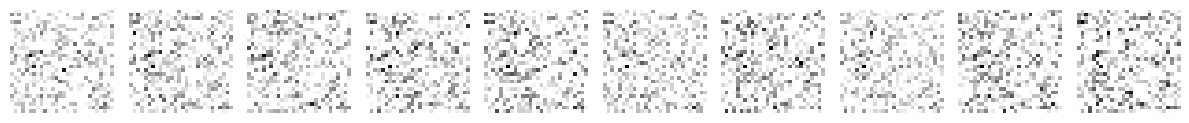

In [ ]:
plot_generated()

In [ ]:
losses = {
    'D': [],
    'G': []
}

In [ ]:
(X, _), (_, _) = mnist.load_data()

In [ ]:
X.shape

(60000, 28, 28)

In [ ]:
X = X.reshape(60_000, 28, 28, 1)

In [ ]:
def fit(epochs= 40, plot_interval= 5, batch_size= 2048):
  no_of_batches = X.shape[0] // batch_size
  for i in tqdm(range(1, epochs+1), desc= 'Total Progress'):   #tqdm only shows progress
    print(f'-------Epoch: {i}-------')
    for j in range(no_of_batches):
      # taking real images of batch sizes
      batch_images = X[np.random.randint(0, 60_000, size= batch_size)]

      # taking fake images of batch size
      noise = np.random.normal(0, 1, size= (batch_size, noise_dim))
      generated_images = generator.predict(noise, verbose= 0)
      generated_images = generated_images.reshape(batch_size, 28, 28, 1)

      # preparing data with fake and real images
      X_train = np.concatenate((batch_images, generated_images))
      y_train = np.concatenate((np.ones(batch_size), np.zeros(batch_size)))

      # training Discriminator
      discriminator.trainable = True
      dis_loss = discriminator.train_on_batch(X_train, y_train)
      # training GAN(by freezing discriminator)  freezing means only weight not change
      discriminator.trainable = False
      X_gan = np.random.normal(0, 1, size= (batch_size, noise_dim))
      y_gan = np.ones(batch_size)
      gan_loss = gan.train_on_batch(X_gan, y_gan)
    losses['D'].append(dis_loss)
    losses['G'].append(gan_loss)
    if i == 1 or i % plot_interval == 0:
      plot_generated()




Total Progress:   0%|          | 0/40 [00:00<?, ?it/s]

-------Epoch: 1-------
1/1 [==============================] - 0s 18ms/step


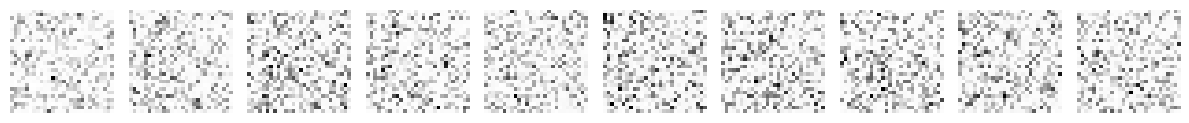

Total Progress:   2%|▎         | 1/40 [00:27<17:45, 27.33s/it]

-------Epoch: 2-------


Total Progress:   5%|▌         | 2/40 [00:34<09:57, 15.72s/it]

-------Epoch: 3-------


Total Progress:   8%|▊         | 3/40 [00:43<07:34, 12.28s/it]

-------Epoch: 4-------


Total Progress:  10%|█         | 4/40 [00:51<06:24, 10.68s/it]

-------Epoch: 5-------
1/1 [==============================] - 0s 20ms/step


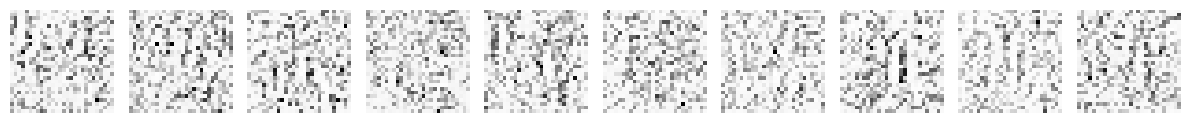

Total Progress:  12%|█▎        | 5/40 [00:58<05:34,  9.56s/it]

-------Epoch: 6-------


Total Progress:  15%|█▌        | 6/40 [01:06<05:07,  9.04s/it]

-------Epoch: 7-------


Total Progress:  18%|█▊        | 7/40 [01:15<04:52,  8.85s/it]

-------Epoch: 8-------


Total Progress:  20%|██        | 8/40 [01:22<04:29,  8.42s/it]

-------Epoch: 9-------


Total Progress:  22%|██▎       | 9/40 [01:31<04:20,  8.39s/it]

-------Epoch: 10-------
1/1 [==============================] - 0s 20ms/step


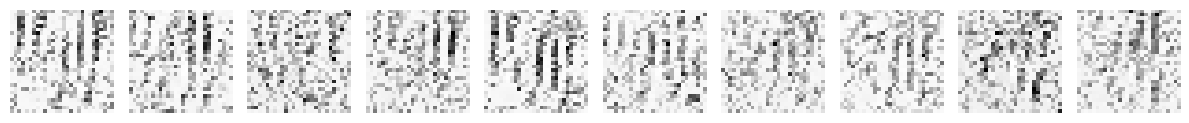

Total Progress:  25%|██▌       | 10/40 [01:40<04:21,  8.70s/it]

-------Epoch: 11-------


Total Progress:  28%|██▊       | 11/40 [01:48<04:05,  8.48s/it]

-------Epoch: 12-------


Total Progress:  30%|███       | 12/40 [01:56<03:52,  8.31s/it]

-------Epoch: 13-------


Total Progress:  32%|███▎      | 13/40 [02:04<03:43,  8.29s/it]

-------Epoch: 14-------


Total Progress:  35%|███▌      | 14/40 [02:12<03:31,  8.12s/it]

-------Epoch: 15-------
1/1 [==============================] - 0s 19ms/step


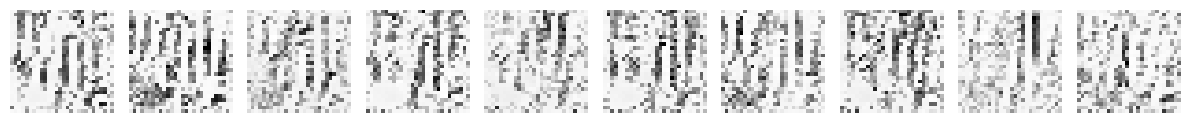

Total Progress:  38%|███▊      | 15/40 [02:21<03:27,  8.30s/it]

-------Epoch: 16-------


Total Progress:  40%|████      | 16/40 [02:29<03:18,  8.27s/it]

-------Epoch: 17-------


Total Progress:  42%|████▎     | 17/40 [02:37<03:11,  8.31s/it]

-------Epoch: 18-------


Total Progress:  45%|████▌     | 18/40 [02:45<02:56,  8.02s/it]

-------Epoch: 19-------


Total Progress:  48%|████▊     | 19/40 [02:54<02:56,  8.42s/it]

-------Epoch: 20-------
1/1 [==============================] - 0s 17ms/step


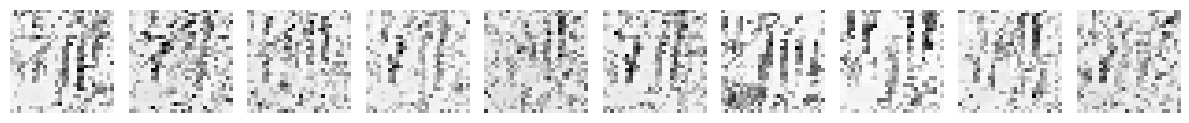

Total Progress:  50%|█████     | 20/40 [03:03<02:49,  8.49s/it]

-------Epoch: 21-------


Total Progress:  52%|█████▎    | 21/40 [03:11<02:37,  8.30s/it]

-------Epoch: 22-------


Total Progress:  55%|█████▌    | 22/40 [03:19<02:29,  8.28s/it]

-------Epoch: 23-------


Total Progress:  57%|█████▊    | 23/40 [03:27<02:21,  8.35s/it]

-------Epoch: 24-------


Total Progress:  60%|██████    | 24/40 [03:35<02:09,  8.10s/it]

-------Epoch: 25-------
1/1 [==============================] - 0s 18ms/step


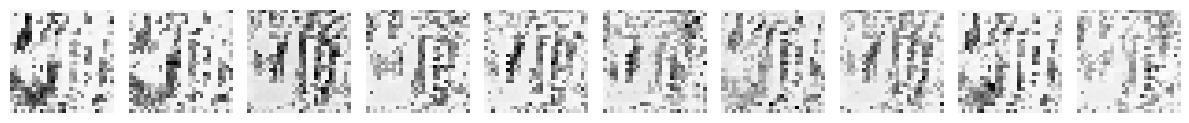

Total Progress:  62%|██████▎   | 25/40 [03:43<02:03,  8.25s/it]

-------Epoch: 26-------


Total Progress:  65%|██████▌   | 26/40 [03:52<01:55,  8.26s/it]

-------Epoch: 27-------


Total Progress:  68%|██████▊   | 27/40 [04:00<01:45,  8.13s/it]

-------Epoch: 28-------


Total Progress:  70%|███████   | 28/40 [04:08<01:37,  8.12s/it]

-------Epoch: 29-------


Total Progress:  72%|███████▎  | 29/40 [04:16<01:29,  8.11s/it]

-------Epoch: 30-------
1/1 [==============================] - 0s 20ms/step


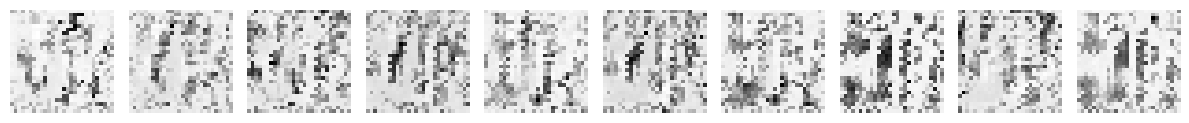

Total Progress:  75%|███████▌  | 30/40 [04:24<01:20,  8.06s/it]

-------Epoch: 31-------


Total Progress:  78%|███████▊  | 31/40 [04:32<01:13,  8.15s/it]

-------Epoch: 32-------


Total Progress:  80%|████████  | 32/40 [04:40<01:05,  8.16s/it]

-------Epoch: 33-------


Total Progress:  82%|████████▎ | 33/40 [04:48<00:55,  7.93s/it]

-------Epoch: 34-------


Total Progress:  85%|████████▌ | 34/40 [04:56<00:48,  8.01s/it]

-------Epoch: 35-------
1/1 [==============================] - 0s 20ms/step


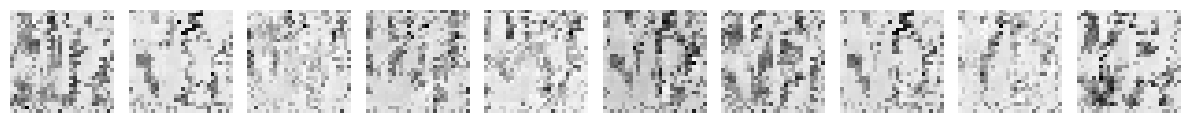

Total Progress:  88%|████████▊ | 35/40 [05:04<00:40,  8.16s/it]

-------Epoch: 36-------


Total Progress:  90%|█████████ | 36/40 [05:12<00:32,  8.08s/it]

-------Epoch: 37-------


Total Progress:  92%|█████████▎| 37/40 [05:20<00:24,  8.01s/it]

-------Epoch: 38-------


Total Progress:  95%|█████████▌| 38/40 [05:28<00:16,  8.02s/it]

-------Epoch: 39-------


Total Progress:  98%|█████████▊| 39/40 [05:36<00:07,  7.91s/it]

-------Epoch: 40-------
1/1 [==============================] - 0s 17ms/step


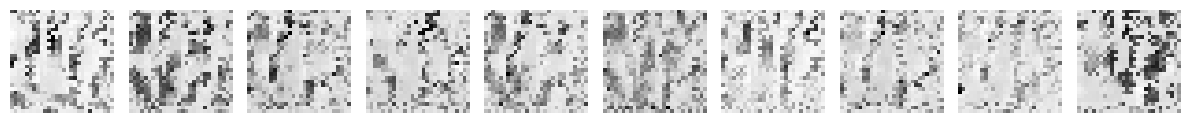

Total Progress: 100%|██████████| 40/40 [05:45<00:00,  8.63s/it]


In [ ]:
fit()